# Preprocessing
## Weighted Sentiment

Likes dan retweets pada sebuah post twitter dapat menggambarkan seberapa banyak orang yang menyukai tweet tersebut. Oleh karena itu, kita dapat mengasumsikan bahwa semakin banyak orang yang menyukai atau meretweet tweet tersebut, semakin setuju mereka dengan sentimen yang terkandung dalam tweet tersebut.  

Bobot yang diberikan pada likes dan retweets berbeda karena user cenderung lebih sering menyukai tweet daripada meretweetnya. Oleh karena itu, bobot yang diberikan pada likes adalah 0.5 dan bobot yang diberikan pada retweets adalah 1.

In [5]:
def calculate_weighted_sentiment(row):
    if row['label'] == 1:
        likes = row['likeCount'] * 0.5
        retweets = row['retweetCount']
        return likes + retweets
    elif row['label'] == -1:
        likes = row['likeCount'] * 0.5
        retweets = row['retweetCount']
        return -likes - retweets
    else:
        return 0
    
df.apply(calculate_weighted_sentiment, axis=1)

NameError: name 'df' is not defined

Mengingat data kabupaten kota yang terlalu imbalanced, data akan diagregasi dalam provinsi. Sentimen dan weighted sentimen akan dirata - rata berdasarkan kode dibawah


In [ ]:
df = df.groupby(['Province']).mean()

# Pengumpulan dataset demografis 

## Dataset demografis
Dataset demografis dikumpulkan dari berbagai situs antara lain:
1. bps.go.id
2. data.kemendikbud.go.id
3. opendata.kpu.go.id

| Fitur                                | Sumber             |
|--------------------------------------|--------------------|
| Kabupaten Kota                       | BPS                |
|     Paslon 1                         |     KPU            |
|     Paslon 2                         |     KPU            |
|     Total                            |     KPU            |
|     Laju Pertumbuhan                 |     BPS            |
|     Laki                             |     BPS            |
|     Perempuan                        |     BPS            |
|     Umur                             |     BPS            |
|     Umur Squared                     |     BPS            |
|     Angka Partisipasi Murni SD       |     BPS            |
|     Angka Partisipasi   Murni SMP    |     BPS            |
|     Angka Partisipasi Murni SMA      |     BPS            |
|     Melek Huruf                      |     BPS            |
|     TPAK                             |     BPS            |
|     pendidikan_SD                    |     BPS            |
|     pendidikan_SMP                   |     BPS            |
|     pendidikan_SMA                   |     BPS            |
|     pendidikan_Universitas           |     BPS            |
|     TK                               |     Kemendikbud    |
|     SD                               |     Kemendikbud    |
|     SMP                              |     Kemendikbud    |
|     SMA                              |     Kemendikbud    |
|     SMK                              |     Kemendikbud    |
|     Universitas                      |     Kemendikbud    |
|     Pengeluaran Bulanan              |     BPS            |
|     Persentase Kemiskinan            |     BPS            |
|     Indeks Pembangunan   Manusia     |     BPS            |
|     DPT                              |     KPU            |
|     Suara Sah                        |     KPU            |

Data tersebut digabungkan menjadi satu dengan sentiment dan weighted sentiment yang telah diolah sebelumnya.  
Sentiment dan weighted sentiment akan dipukul rata pada level provinsi.

In [1]:
import pandas as pd 

df = pd.read_csv('Data/Dataset.csv', decimal =".", thousands=",")
df.head()

,Kota,Paslon 1,Paslon 2,Total,Laju Pertumbuhan,Laki,Perempuan,Umur,Umur Squared,APM SD,...,SMA,SMK,Universitas,Pengeluaran Bulanan,Persentase Kemiskinan,Indeks Pembangunan Manusia,DPT,Sentiment,Weighted Sentiment,Partisipasi
0,Kepulauan Seribu,8826,8281,17107,1.42,12117,12226,28.900489,835.238260,92.02,...,1,1,0,1122235,12.09,71.40,19013,-0.258667,-1.149626,0.836978
1,Jakarta Barat,830191,611338,1441529,1.19,1305220,1284713,30.514792,931.152536,98.74,...,119,120,33,2144622,3.25,81.21,1738262,-0.258667,-1.149626,0.829293
2,Jakarta Timur,855365,985329,1840694,0.37,1477494,1460365,30.868943,952.891663,98.59,...,123,201,88,1958915,3.12,82.69,2246279,-0.258667,-1.149626,0.819441
3,Jakarta Pusat,333010,315164,648174,0.27,462170,465939,32.842227,1078.611842,98.12,...,53,30,61,2156112,3.68,81.24,809975,-0.258667,-1.149626,0.800240
4,Jakarta Utara,571704,416426,988130,1.23,896714,916201,30.766312,946.565947,99.71,...,89,77,97,1934450,5.04,80.17,1253753,-0.258667,-1.149626,0.788138


## Pengecekan Data Null

Data akan diproses dan dicek sebelum melakukan EDA dan pemodelan.  
Tidak banyak langkah praproses yang dilakukan karena data yang digunakan sudah cukup bersih.

In [3]:
import numpy as np
df = df.replace('', np.nan)
nan_values = df[df.isna().any(axis=1)]
nan_values

,Kota,Paslon 1,Paslon 2,Total,Laju Pertumbuhan,Laki,Perempuan,Umur,Umur Squared,APM SD,...,SMA,SMK,Universitas,Pengeluaran Bulanan,Persentase Kemiskinan,Indeks Pembangunan Manusia,DPT,Sentiment,Weighted Sentiment,Partisipasi


## Drop Kolom yang Tidak Digunakan

4 kolom tidak digunakan percobaan ini karena pada saat prediksi data tersebut tidak akan tersedia.
1. Paslon 1: Jumlah suara paslon 1
2. Paslon 2: Jumlah suara paslon 2
3. Total: Total suara sah
4. Kabupaten Kota: Nama kabupaten kota

In [2]:
df = df.drop(['Kota','Paslon 1','Paslon 2','Total'],axis=1)

## Normalisasi dengan MinMaxScaler

Normalisasi dilakukan untuk menghindari bias pada data yang memiliki skala yang berbeda.  
MinMaxScaler merupakan cara normalisasi yang digunakan karena data yang digunakan tidak memiliki distribusi normal.  

In [3]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

## Visualisasi Data

Karena prediksi partisipasi merupakan tugas regresi, maka data akan divisualisasikan dengan scatter plot.  
Untuk membantu visualisasi, dimensionality reduction dengan berbagai metode akan dilakukan.  
Data akan dibagi menjadi 4 kuartil untuk memudahkan visualisasi.  

### Pembuatan Kuartil Data

In [10]:
quartiles = df_minmax['Partisipasi'].quantile([.25, .5, .75]).tolist()
quartiles = [0] + quartiles + [float('inf')]
df_quartiles = df_minmax
df_quartiles['quartiles'] = pd.cut(df_minmax['Partisipasi'], bins=quartiles, labels=['1st', '2nd', '3rd', '4th'])
df_minmax = df_minmax.drop(['Partisipasi','quartiles'], axis=1)

### Visualisasi Dengan TSNE

TSNE merupakan metode dimensionality reduction menggunakan prinsip manifold learning.  



<AxesSubplot: xlabel='X', ylabel='Y'>

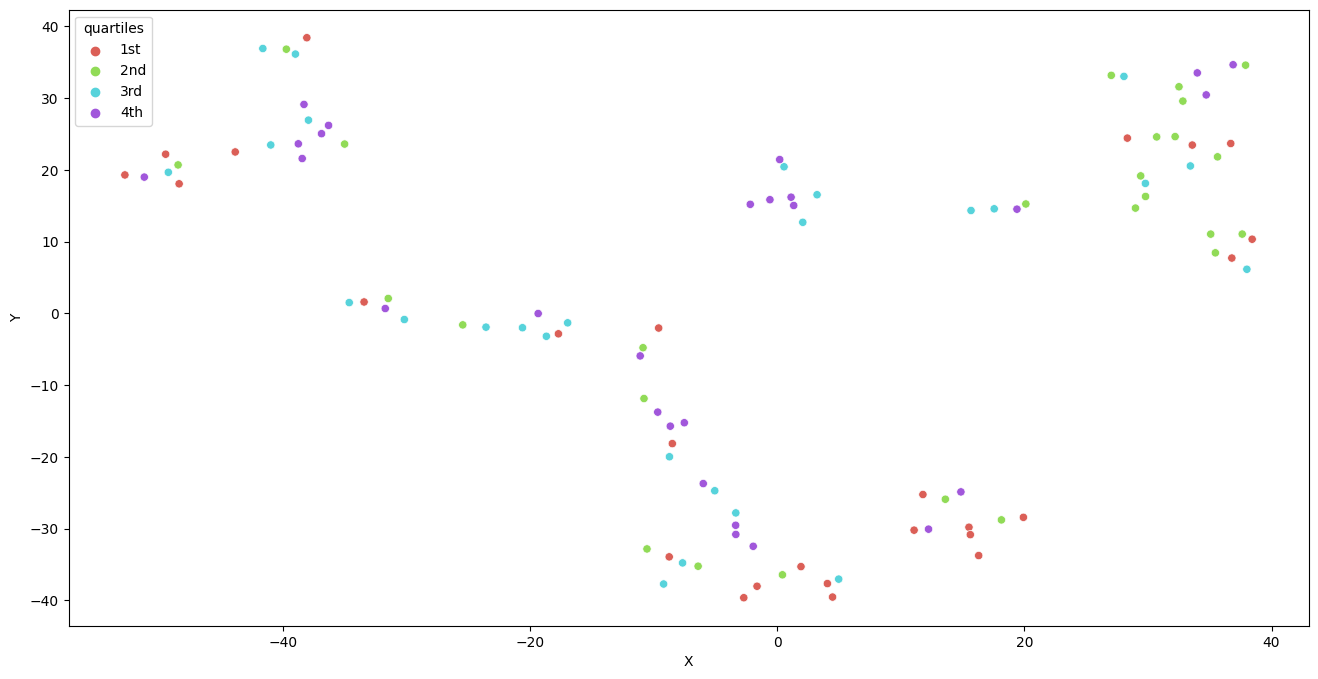

In [11]:
  import matplotlib.pyplot as plt
  import seaborn as sns


  X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(df_minmax)
  X_embedded.shape
  df_quartiles['X'] = X_embedded[:,0]
  df_quartiles['Y'] = X_embedded[:,1]

  plt.figure(figsize=(16,8))
  sns.scatterplot(
      x="X", y="Y",
      hue="quartiles",
      palette=sns.color_palette("hls", 4),
      data=df_quartiles,
      legend="full",
  )


Pada hasil diatas, terlihat bahwa data tidak terlalu terpisah kecuali pada kuartil 2.  

## Visualisasi dengan PCA

PCA merupakan metode dimensionality reduction yang menggunakan prinsip eigenvalue decomposition.  

<AxesSubplot: xlabel='X_PCA', ylabel='Y_PCA'>

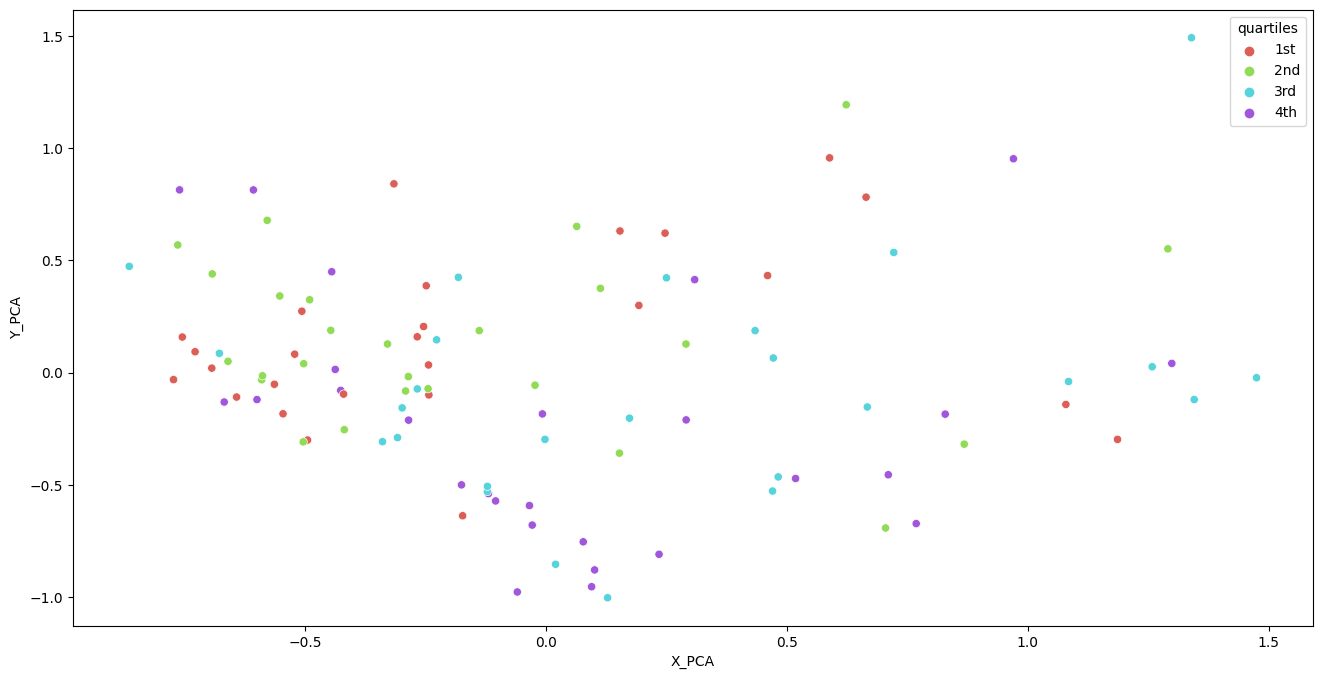

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df_minmax)
df_quartiles['X_PCA'] = X_PCA[:,0]
df_quartiles['Y_PCA'] = X_PCA[:,1]

plt.figure(figsize=(16,8))
sns.scatterplot(
    x="X_PCA", y="Y_PCA",
    hue="quartiles",
    palette=sns.color_palette("hls", 4),
    data=df_quartiles,
    legend="full",
)

PCA tidak menghasailkan yang baik. Data terlihat menyatu pada bagian kiri graf.

## Visualisasi dengan UMAP
Umap merupakaan teknik dimensionality reduction yang menggunakan prinsip manifold learning.

<AxesSubplot: xlabel='X_UMAP', ylabel='Y_UMAP'>

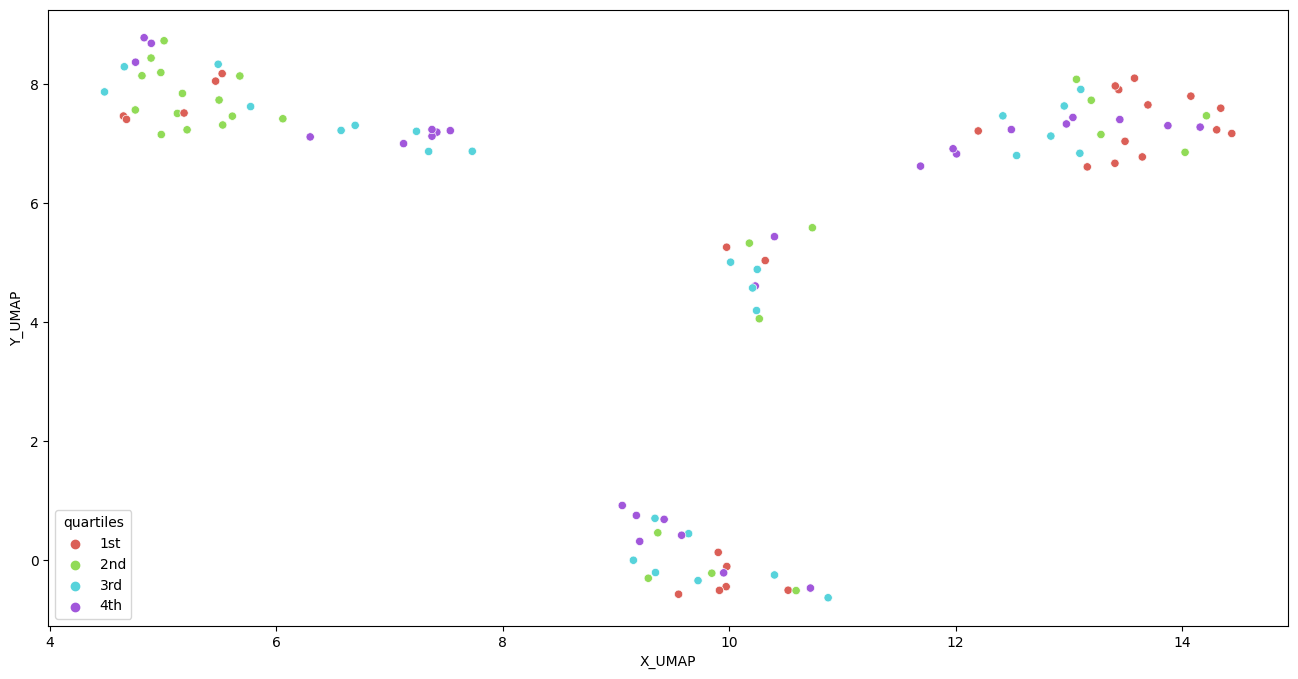

In [13]:
import umap
reducer = umap.UMAP(random_state=42,n_components=2)
embeddingUmap = reducer.fit_transform(df_minmax)
df_quartiles['X_UMAP'] = embeddingUmap[:,0]
df_quartiles['Y_UMAP'] = embeddingUmap[:,1]

plt.figure(figsize=(16,8))
sns.scatterplot(
    x="X_UMAP", y="Y_UMAP",
    hue="quartiles",
    palette=sns.color_palette("hls", 4),
    data=df_quartiles,
    legend="full",
)


Terlihat data terbagi ke 4 bagian yang berbeda. Namun, data pada bagian tersebut tidak terpisah.

## Visualisasi dengan LDA
LDA merupakan metode dimensionality reduction yang menggunakan prinsip maximum likelihood.  

<AxesSubplot: xlabel='X_LDA', ylabel='Y_LDA'>

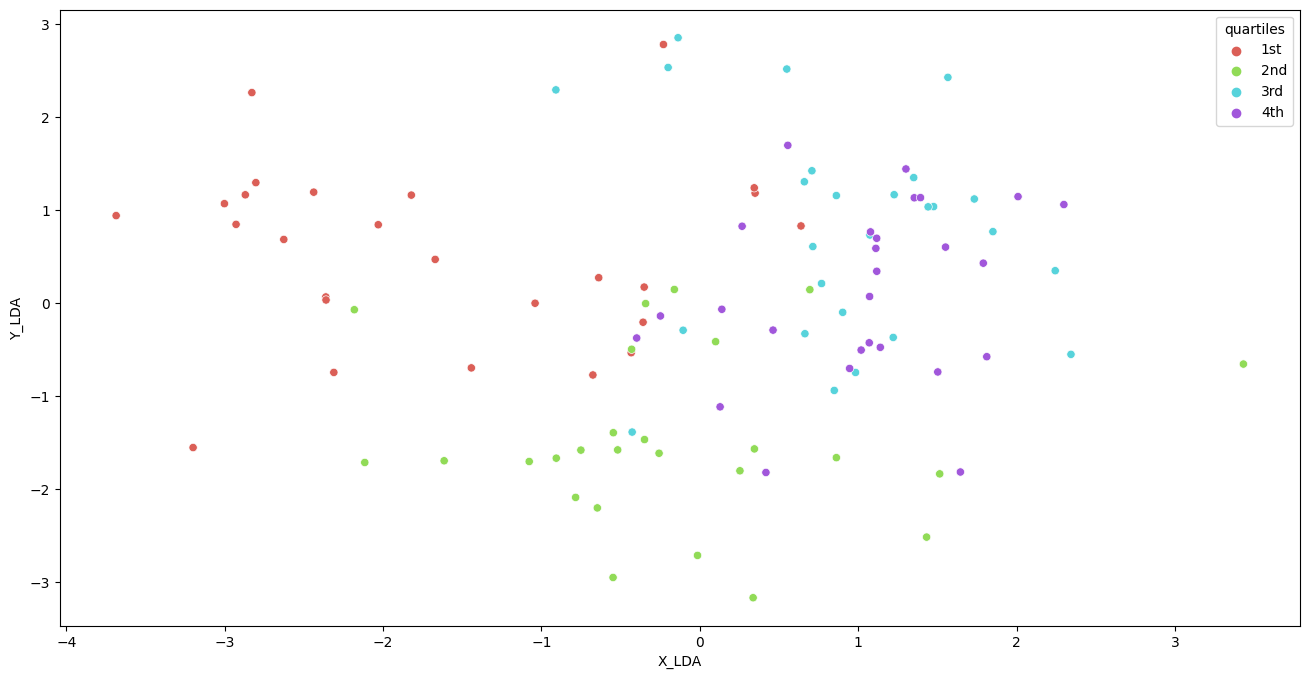

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_LDA = LDA(n_components=2).fit_transform(df_minmax,df_quartiles['quartiles'].to_list())
df_quartiles['X_LDA'] = X_LDA[:,0]
df_quartiles['Y_LDA'] = X_LDA[:,1]

plt.figure(figsize=(16,8))
sns.scatterplot(
    x="X_LDA", y="Y_LDA",
    hue="quartiles",
    palette=sns.color_palette("hls", 4),
    data=df_quartiles,
    legend="full",
)

Hasil LDA terlihat paling baik dibandingkan dengan metode lain. Hasil ini terjadi karena LDA mengetahui label dari data sehingga dapat memisahkan data dengan baik.  

Dari keempat visualisasi tersebut dapat disimpulkan bahwa ada separasi antar kuartil. Namun, separasi tersebut tidak terlalu jelas. Feature selection akan dilakukan untuk memperjelas separasi tersebut.

## Correlation Heatmap

Correlation dari variabel merupakan salah satu cara untuk mengetahui apakah variabel tersebut dapat digunakan untuk memprediksi variabel lain.  
Heatmap dari nilai nilai korelasi dapat mempermudah kita untuk melihat korelasi antar variabel.  

<AxesSubplot: >

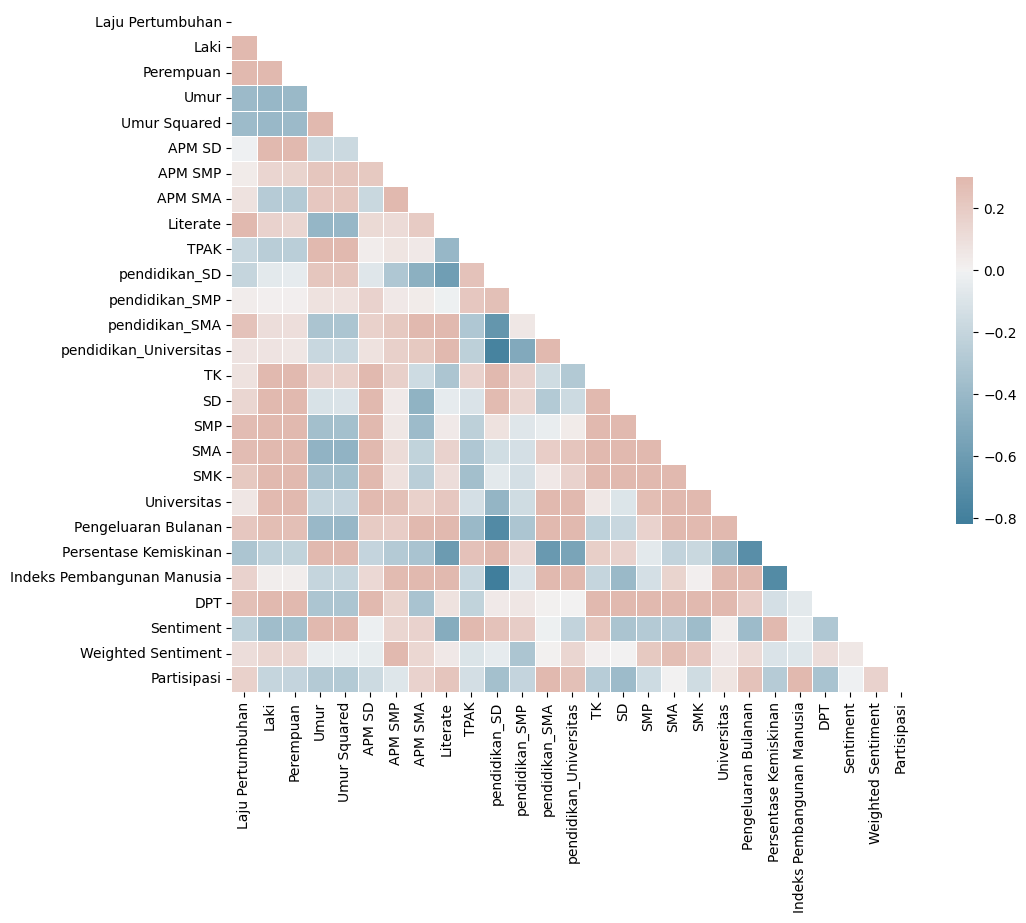

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Karena regresi merupakan tujuan dari percobaan ini, maka variabel yang memiliki korelasi yang tinggi dengan variabel target akan digunakan.  
Korelasi akan diplot ulang menggunakan fungsi dibawah.

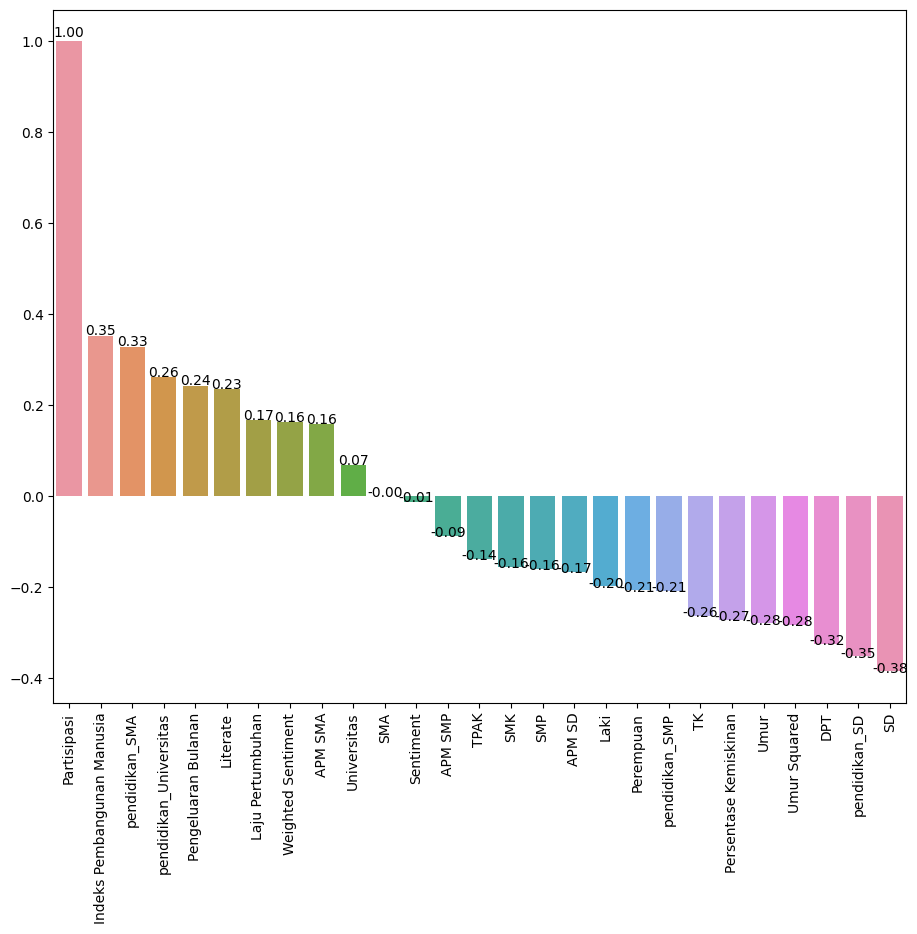

In [9]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

barplot = zip(corr.index,corr['Partisipasi'])
barplot = sorted(barplot, key=lambda x: x[1], reverse= True)
barplotx, barploty = zip(*barplot)

barplotx = np.array(barplotx)
barploty = np.array(barploty)

f, ax = plt.subplots(figsize=(11, 9))
p = sns.barplot(x=barplotx,y=barploty)
plt.xticks(rotation=90)
show_values(p)

Terlihat bahwa semua varabel kecuali banyak universitas dan banyak SMA memiliki korelasi dengan partisipasi.  
Dari illustrasi diatas, beberapa hipotesa dapat dibuktikan:
1. Indeks Pembangunan Manusia memiliki korelasi yang tinggi dengan partisipasi. [Source](https://doi.org/10.1017/gov.2016.31)
2. Pendidikan tinggi dan literasi memiliki korelasi yang tinggi dengan partisipasi. [Source 1](https://doi.org/10.1017/gov.2016.31) [Source 2](https://doi.org/10.1016/j.electstud.2012.12.006)
3. Pengeluaran bulanan yang tinggi yang memiliki korelasi yang tinggi. [Source](https://doi.org/10.1016/j.electstud.2012.12.006)
4. Laju pertumbuhan yang dapat berarti populasi yang stabil mempunyai korelasi tinggi. [Source 1](https://doi.org/10.1016/j.electstud.2005.09.002) [Source 2](https://doi.org/10.1016/j.electstud.2016.03.005)
5. Sentimen yang belum pasti korelasinya dengan partisipasi. [Source](https://doi.org/10.1016/j.electstud.2016.03.005)
6. Jumlah penduduk yang berkorelasi negative dan perbandingan gender tidak berkorelasi. [Gender 1,](https://doi.org/10.1016/j.electstud.2012.12.) [Gender 2,](https://doi.org/10.2307/2111613) [Gender 3,](https://doi.org/10.1080/01402382.2018.1504486) [Gender 4](https://doi.org/10.1080/01402382.2018.1504486)  
[Jumlah Penduduk 1, ](https://doi.org/10.1016/j.electstud.2005.09.002) [Jumlah Penduduk 2, ](https://doi.org/10.1016/j.electstud.2016.03.005) [Jumlah Penduduk 3](https://doi.org/10.1017/gov.2016.30)

## Cross Validation

Cross validation adalah teknik sampling yang digunakan untuk menghindari overfitting atau selection bias.  
Pada penelitian ini, RepeatedKFold digunakan untuk melakukan cross validation karena data yang digunakan tidak terlalu banyak.  
Folding akan dilakukan sebanyak 10 kali dengan 3 iterasi.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

dfX, dfY = df_minmax.iloc[:, :-1], df_minmax.iloc[:, [-1]]
kf = RepeatedKFold(n_splits=10, n_repeats = 3 , random_state=1)
kf.get_n_splits(dfX)


30